# Developing a Regression Model for Property Valuation Data
### Jennifer Zhuang, Summer 2024
## Python Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import itertools
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

## Defining Our Dataset

In [2]:
data = {
    'y': [25.9, 29.5, 27.9, 25.9, 29.9, 29.9, 30.9, 28.9, 35.9, 31.5, 31.0, 30.9, 30.0, 36.9, 41.9, 40.5, 43.9, 37.5, 37.9, 44.5, 37.9, 38.9, 36.9, 45.8],
    'x1': [4.9176, 5.0208, 4.5429, 4.5573, 5.0597, 3.8910, 5.8980, 5.6039, 5.8282, 5.3003, 6.2712, 5.9592, 5.0500, 8.2464, 6.6969, 7.7841, 9.0384, 5.9894, 7.5422, 8.7951, 6.0831, 8.3607, 8.1400, 9.1416],
    'x2': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.5, 1.5, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.0, 1.5],
    'x3': [3.4720, 3.5310, 2.2750, 4.0500, 4.4550, 4.4550, 5.8500, 9.5200, 6.4350, 4.9883, 5.5200, 6.6660, 5.0000, 5.1500, 6.9020, 7.1020, 7.8000, 5.5200, 5.0000, 9.8900, 6.7265, 9.1500, 8.0000, 7.3262],
    'x4': [0.9980, 1.5000, 1.1750, 1.2320, 1.1210, 0.9880, 1.2400, 1.5010, 1.2250, 1.5520, 0.9750, 1.1210, 1.0200, 1.6640, 1.4880, 1.3760, 1.5000, 1.2560, 1.6900, 1.8200, 1.6520, 1.7770, 1.5040, 1.8310],
    'x5': [1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0, 1.0, 1.0, 2.0, 0.0, 2.0, 1.5, 1.0, 1.5, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.5],
    'x6': [7, 7, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 5, 8, 7, 6, 7, 6, 6, 8, 6, 8, 7, 8],
    'x7': [4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4],
    'x8': [42, 62, 40, 54, 42, 56, 51, 32, 32, 30, 30, 32, 46, 50, 22, 17, 23, 40, 22, 50, 44, 48, 3, 31],
    'x9': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
}

# Creating the dataframe
df = pd.DataFrame(data)
display(df)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,25.9,4.9176,1.0,3.4720,0.998,1.0,7,4,42,0
1,29.5,5.0208,1.0,3.5310,1.500,2.0,7,4,62,0
2,27.9,4.5429,1.0,2.2750,1.175,1.0,6,3,40,0
3,25.9,4.5573,1.0,4.0500,1.232,1.0,6,3,54,0
4,29.9,5.0597,1.0,4.4550,1.121,1.0,6,3,42,0
5,29.9,3.8910,1.0,4.4550,0.988,1.0,6,3,56,0
6,30.9,5.8980,1.0,5.8500,1.240,1.0,7,3,51,1
7,28.9,5.6039,1.0,9.5200,1.501,0.0,6,3,32,0
8,35.9,5.8282,1.0,6.4350,1.225,2.0,6,3,32,0
9,31.5,5.3003,1.0,4.9883,1.552,1.0,6,3,30,0


### Estimation of Model Parameters & Summary Statistics
Below is a reusable function used to perform regression analysis on a provided x design matrix and y response variable vector. 

In [3]:
def fit_lin_reg_model(X, y):
    n = len(y)
    p = X.shape[1]
    alpha = 0.05  # Significance level
    
    # Calculate the coefficients using the normal equation
    X_transpose = X.T
    beta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
    print("beta: ", beta)
    print()

    # calculate residuals 
    y_pred = X @ beta
    residuals = y - y_pred
    SS_res = np.sum(residuals ** 2)
    print("SS_res = ", SS_res)
    SS_R = np.sum((y_pred - np.mean(y)) ** 2)
    print("SS_R = ", SS_R)
    SS_T = SS_R + SS_res
    print("SS_T = ", SS_T)
    print()

    # calculate covar matrix
    MSRes = SS_res/(n-p)
    C = MSRes * np.linalg.inv(X_transpose @ X)
    
    # t-statistics for each predictor
    beta_tstat = []
    beta_pval = []
    i = 0
    for b in beta:
        t_stat = b / np.sqrt(C[i, i])
        beta_tstat.append(round(t_stat, 4))
        p_value = 2 * (1 - stats.t.cdf(t_stat, n-p))
        beta_pval.append(round(p_value, 4))
        i += 1
    t_critical = stats.t.ppf(alpha / 2, n-p)
    print("beta_tstat : ", beta_tstat)
    print("t_critical : ", t_critical) # (reject h0 if tstat >)
    print("beta_pval : ", beta_pval)
    print()

    # Calculate F statistic (significance of regr)
    F0 = (SS_R/(p-1))/(SS_res/(n-p))
    f_critical = stats.f.ppf(1 - alpha, p-1, n-p)
    p_value = 1 - stats.f.cdf(F0, p-1, n-p)
    print("F0 : ", F0)
    print("f_critical : ", f_critical) # (reject h0 if fstat >)
    print("p_value : ", p_value)
    print()
    
    # Calculate R^2_p (coef. of mult determination)
    R2_p = SS_R / SS_T
    print("R2_p = ", R2_p)
    
    # Calculate R^2_adj,p
    R2_adj_p = 1 - ((n-1)/(n-p))*(1 - R2_p)
    print("R2_adj_p = ", R2_adj_p)
    
    # Calculate Residual Mean Sq
    MS_res = SS_res / (n - len(beta)-1)
    print("MS_res = ", MS_res)
    
    return (beta, SS_res, F0, p_value, R2_p, R2_adj_p, MS_res)

We first fit a linear regression model on the entire dataset and all the regressors:
$$y =\beta_0+\beta_1x_2+\beta_2x_2+\beta_3x_3+\beta_4x_4+\beta_5x_5+\beta_6x_6+\beta_7x_7+\beta_8x_8+\beta_9x_9 + \epsilon$$

In [4]:
x0 = df.filter(regex='^x')
X0 = np.hstack([np.ones((x0.shape[0], 1)), x0.values])
y0 = df['y']
beta0, SS_res0, F0, p_value0, R2_p0, R2_adj_p0, MS_res0 = fit_lin_reg_model(X0, y0)

beta:  [14.92764759  1.92472156  7.0005342   0.14917793  2.7228079   2.00668402
 -0.41012376 -1.4032353  -0.03714908  1.55944663]

SS_res =  121.74816335467074
SS_R =  707.2980866453609
SS_T =  829.0462500000316

beta_tstat :  [2.5246, 1.8688, 1.6279, 0.3042, 0.6246, 1.461, -0.1724, -0.4133, -0.5568, 0.8049]
t_critical :  -2.1447866879169277
beta_pval :  [0.0243, 0.0827, 0.1258, 0.7654, 0.5423, 0.1661, 1.1344, 1.3143, 1.4135, 0.4343]

F0 :  9.037027235555387
f_critical :  2.6457907352338195
p_value :  0.0001850299294895441

R2_p =  0.8531467172613517
R2_adj_p =  0.7587410355007921
MS_res =  9.365243334974672


We can also use the built in statsmodels api library to check our work as well. 

In [5]:
# Fit the model
model = sm.OLS(y0, X0).fit()

# Summary of the regression analysis
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     9.037
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           0.000185
Time:                        12:47:46   Log-Likelihood:                -53.541
No. Observations:                  24   AIC:                             127.1
Df Residuals:                      14   BIC:                             138.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9276      5.913      2.525      0.024       2.246      27.609
x1             1.9247      1.030      1.869      0.083      -0.284       4.134
x2             7.0005      4.300      1.628      0.126      -2.223      16.224
x3             0.1492      0.490      0.304      0.765      -0.903       1.201
x4             2.7228      4.360      0.625      0.542      -6.628      12.073
x5             2.0067      1.374      1.461      0.166      -0.939       4.953
x6            -0.4101      2.379     -0.172      0.866      -5.512       4.691
x7            -1.4032      3.396     -0.413      0.686      -8.686       5.879
x8            -0.0371      0.067     -0.557      0.586      -0.180       0.106
x9             1.5594      1.937      0.805      0.434      -2.596       5.715
==============================================================================
Omnibus:                        1.511   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.082
Skew:                           0.247   Prob(JB):                        0.582
Kurtosis:                       2.084   Cond. No.                         470.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Get the residuals
residuals = model.resid
# Get the hat matrix (leverages)
hat_matrix = model.get_influence().hat_matrix_diag
# Calculate the PRESS statistic
press = np.sum((residuals / (1 - hat_matrix))**2)
print('PRESS :', press)

PRESS : 393.491956641063


### Residual Analysis

In [7]:
y_pred0 = X0 @ beta0
print("y_pred = \n", y_pred0)

y_pred = 
 [26.59111577 29.42910051 28.06095083 27.98857057 29.15952503 26.02788236
 32.12011762 30.3620185  33.59539269 31.32148879 33.51181776 33.5988193
 30.16467895 39.86147425 40.07090166 39.92142056 39.64740986 35.11582104
 39.81147468 43.60887702 36.33992267 42.61960372 39.70529044 42.06632544]


In [8]:
def calculate_residual_statistics(X, y):
    n = len(y)
    p = X.shape[1]
    
    # Calculate the coefficients using the normal equation
    X_transpose = X.T
    beta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

    # Calculate hat matrix 
    XT = X.T  # Transpose of X
    XTX = XT.dot(X)  # X'X
    XTX_inv = np.linalg.inv(XTX)  # (X'X)^-1
    H = X.dot(XTX_inv).dot(XT)  # H = X(X'X)^-1X'
    leverage = np.diag(H)
    
    # Calculate SS (sum of sq)
    y_pred = X @ beta
    residuals = y - y_pred
    SS_res = np.sum(residuals ** 2)
    
    # Calculate Residual Mean Sq
    MS_res = SS_res / (n - len(beta)-1)
    # print("MS_res = ", MS_res)

    # Calculate S^2_i
    S2_i = (MS_res * (n - p) - residuals**2 / (1 - leverage)) / (n - p - 1)

    # calculate R-Student
    r_student = residuals / np.sqrt(S2_i * (1 - leverage))
    
    return r_student, leverage

r_student0, leverage0 = calculate_residual_statistics(X0, y0)
print(np.array(r_student0))
# print(leverage0)

[-0.41208731  0.02986854 -0.05829807 -0.74193648  0.24624827  1.66388676
 -0.49862799 -0.90234609  0.86780606  0.0703839  -1.06742772 -1.0723064
 -0.07626823 -1.30358639  1.08545958  0.24451002  2.17031348  1.14869407
 -0.83099462  0.36338743  0.65557313 -1.53987182 -1.37086557  1.5226053 ]


### Normal Probability Plot

<Figure size 100x100 with 0 Axes>

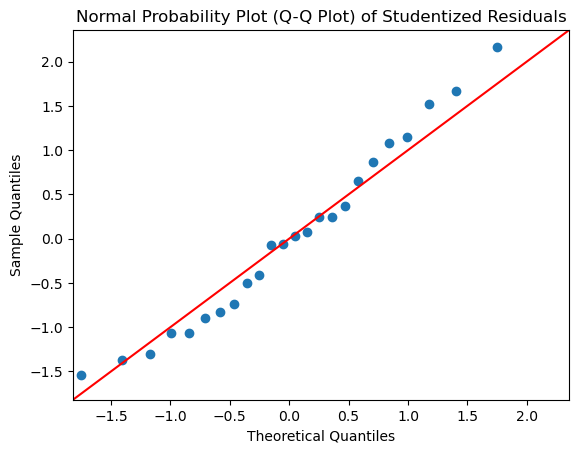

In [9]:
def plot_normal_probability(residuals, string):
    plt.figure(figsize=(1, 1))
    sm.qqplot(r_student0, line='45')
    plt.title('Normal Probability Plot (Q-Q Plot) of Studentized Residuals')
    filename = f"{string}.png"
    plt.savefig(filename)
    plt.show()

plot_normal_probability(r_student0, 'r_student_0')

### Residuals vs Fitted Values
We can plot studentized residuals $t_i$ vs fitted values $y_i$

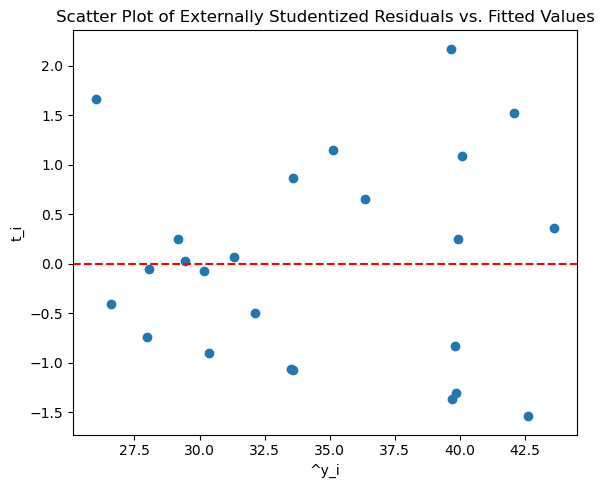

In [10]:
def create_scatterplot(x_axis, y_axis, filename, x_title, y_title, title):
    plt.figure(figsize=(6.5, 5.25))
    plt.scatter(x_axis, y_axis)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)
    filename = f"{filename}_tvsy.png"
    plt.savefig(filename)
    plt.show()

create_scatterplot(y_pred0, r_student0, 'y_pred0', '^y_i', 't_i', 'Scatter Plot of Externally Studentized Residuals vs. Fitted Values')

### Outliers And Treatment of Influential Points
* Next, we calculate the Cook's distance as a measure of influence. 

In [11]:
influence = model.get_influence()
cooks_d = influence.cooks_distance
print(cooks_d[0])

top_5_cooks = np.argsort(np.abs(cooks_d[0]))[-5:]
print("Top 5 Influential points: ", top_5_cooks)
print("Top 5 pts Cook's D: ", [np.round(cooks_d[0][i],4) for i in top_5_cooks])

[4.93699857e-02 8.17165608e-05 1.27224679e-04 1.35379121e-02
 7.71521079e-04 1.41711461e-01 1.84709711e-02 2.32421836e-01
 2.90402081e-02 3.25813028e-04 8.19632295e-02 5.67015251e-02
 7.83771469e-04 1.26937660e-01 2.82743849e-01 5.47316898e-03
 3.72212352e-01 1.56357557e-01 6.16011165e-02 1.00101931e-02
 3.49304057e-02 1.07426987e-01 2.10277237e-01 9.66189726e-02]
Top 5 Influential points:  [17 22  7 14 16]
Top 5 pts Cook's D:  [0.1564, 0.2103, 0.2324, 0.2827, 0.3722]


* Find the effect of removing the top influential points. 

In [12]:
r2_adj_scores = []
for indx in top_5_cooks:
    df_removed = df.drop(index=indx)
    x1 = df_removed.filter(regex='^x')
    X1 = np.hstack([np.ones((x1.shape[0], 1)), x1.values])
    y1 = df_removed['y']
    # Fit the model
    model1 = sm.OLS(y1, X1).fit()
    r2_adj_scores.append(model1.rsquared_adj)
print("R^2 adj after removal: ", np.round(r2_adj_scores,4))

R^2 adj after removal:  [0.7738 0.7839 0.7573 0.7575 0.8011]


* Keeping in mind our original full model with all data points has a adjusted $R^2$ score of around 0.75, we can see that the impact of removing the datapoint at index 16 and index 22 have pretty large effects on our model adequacy. 

### Multicollinearity
* First we calculate the Variance Inflation Factors

In [13]:
X = x0
X = add_constant(X)

# Calculate VIF for each regressor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

  Feature        VIF
0   const  96.487448
1      x1   7.021036
2      x2   2.835413
3      x3   2.454907
4      x4   3.836477
5      x5   1.823605
6      x6  11.710101
7      x7   9.722663
8      x8   2.320887
9      x9   1.942494


* Then we create the correlation matrix

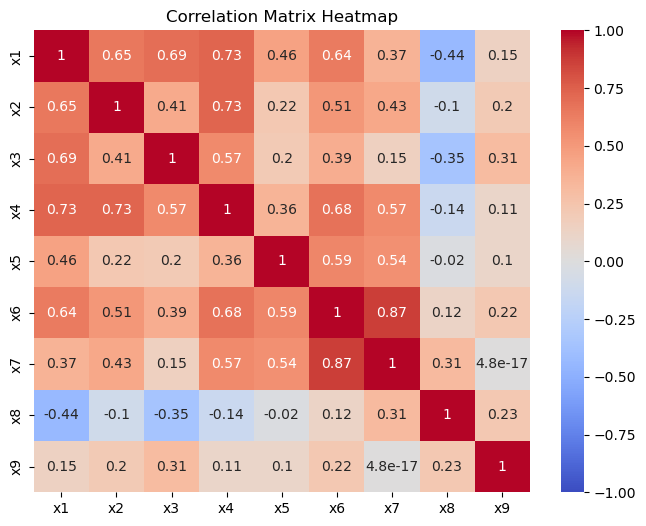

In [14]:
# Compute the correlation matrix
corr_matrix = x0.corr()

# Create a heatmap from the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.savefig("correlation_matrix_heatmap.png")
plt.show()

## All Possible Regressions
* First we perform all possible regressions on all of the regressors
* Note: we removed the outlier above (at i = 22)

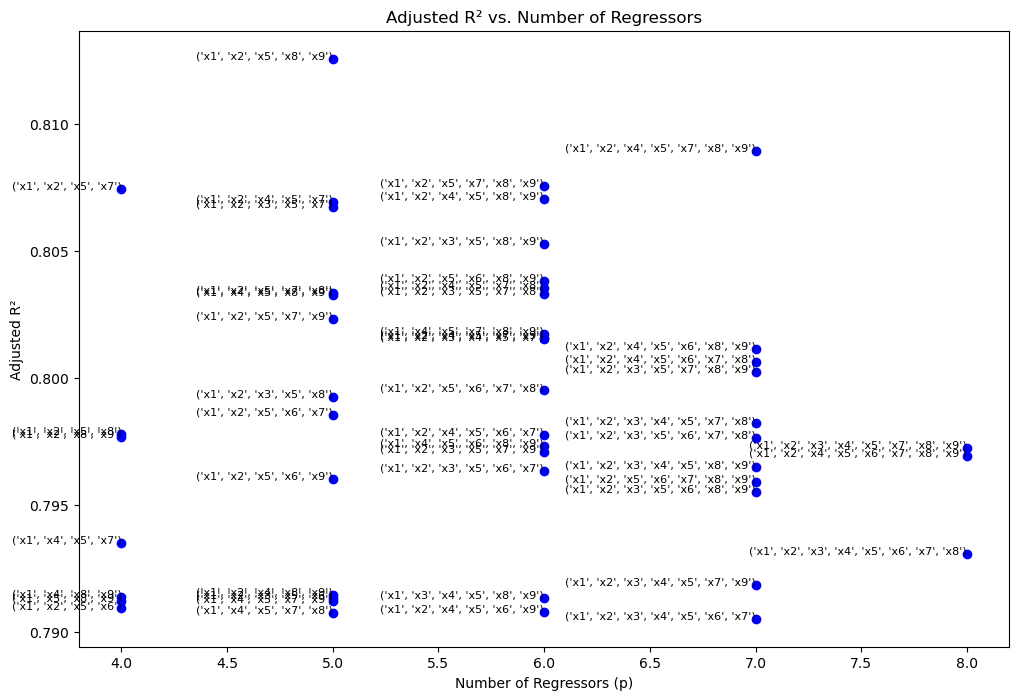

In [15]:
def all_possible_regressions(X, y):
    results = []
    predictors = X.columns
    
    for k in range(1, len(predictors) + 1):
        for subset in itertools.combinations(predictors, k):
            X_subset = X[list(subset)]
            X_subset = sm.add_constant(X_subset)  # Add constant term (intercept)
            
            # Fit the model
            model = sm.OLS(y, X_subset).fit()

            # Get the residuals
            residuals = model.resid
            # Get the hat matrix (leverages)
            hat_matrix = model.get_influence().hat_matrix_diag
            # Calculate the PRESS statistic
            press = np.sum((residuals / (1 - hat_matrix))**2)

            # Get the Residual Sum of Squares (RSS)
            RSS = np.sum(model.resid ** 2)
            df_resid = model.df_resid  # Degrees of freedom for residuals
            MS_Res = RSS / df_resid
            
            # Store the results
            results.append({
                'model': model,
                'predictors': subset,
                'p (num regressors)': len(subset),
                'AIC': model.aic,
                'BIC': model.bic,
                'Adj R2': model.rsquared_adj,
                'PRESS' : press,
                'MS Res' : MS_Res
            })
    
    # Convert results to a DataFrame for easy viewing
    results_df = pd.DataFrame(results)
    return results_df

df_new = df.drop(index=22)
x1 = df_new.filter(regex='^x')
y1 = df_new['y']
results_df = all_possible_regressions(x1, y1)

# Sort by Adjusted R² to find the best model
best_models_r2 = results_df.sort_values('Adj R2', ascending=False).head(50)
# print(best_models)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(best_models_r2['p (num regressors)'], best_models_r2['Adj R2'], color='blue')

# Labeling each point with the corresponding regressors
for i in range(len(best_models_r2)):
    plt.annotate(best_models_r2['predictors'].iloc[i], 
                 (best_models_r2['p (num regressors)'].iloc[i], best_models_r2['Adj R2'].iloc[i]),
                 fontsize=8, ha='right')

# Adding labels and title
plt.xlabel('Number of Regressors (p)')
plt.ylabel('Adjusted R²')
plt.title('Adjusted R² vs. Number of Regressors')

# Show plot
plt.show()

* Next, let's include interaction variables and perform all possible regressions again 

In [16]:
df_interactions = df.drop(index=22)

df_interactions['x6*x7'] = df_interactions['x6'] * df_interactions['x7']
df_interactions['x1*x2'] = df_interactions['x1'] * df_interactions['x2']
# df_interactions['x1*x3'] = df_interactions['x1'] * df_interactions['x3']
df_interactions['x1*x4'] = df_interactions['x1'] * df_interactions['x4']
df_interactions['x1*x6'] = df_interactions['x1'] * df_interactions['x6']
df_interactions['x2*x4'] = df_interactions['x2'] * df_interactions['x4']
df_interactions['x4*x6'] = df_interactions['x4'] * df_interactions['x6']

# # 2, 3, 4, 6
# df_interactions['x1*x2*x3'] = df_interactions['x1'] * df_interactions['x2'] * df_interactions['x3']
df_interactions['x1*x2*x4'] = df_interactions['x1'] * df_interactions['x2'] * df_interactions['x4']
# df_interactions['x1*x2*x6'] = df_interactions['x1'] * df_interactions['x2'] * df_interactions['x6']
# df_interactions['x1*x3*x4'] = df_interactions['x1'] * df_interactions['x3'] * df_interactions['x4']
# df_interactions['x1*x3*x6'] = df_interactions['x1'] * df_interactions['x3'] * df_interactions['x6']
# df_interactions['x1*x4*x6'] = df_interactions['x1'] * df_interactions['x4'] * df_interactions['x6']

x2 = df_interactions.filter(regex='^x')
y2 = df_interactions['y']
results_df = all_possible_regressions(x2, y2)


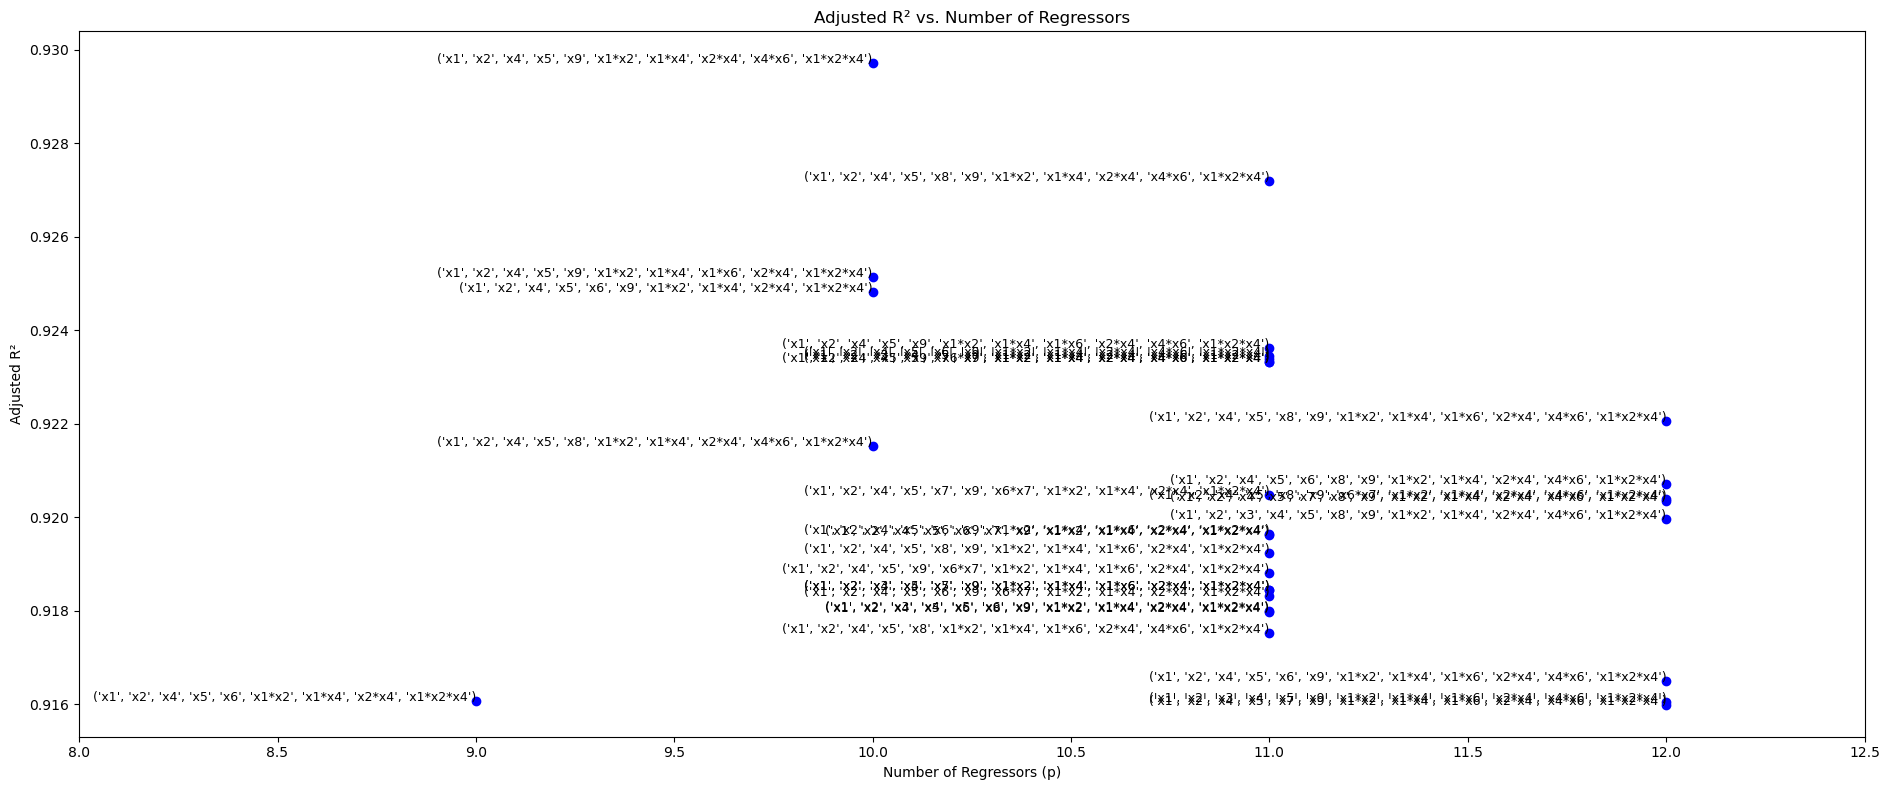

In [17]:

# Sort by Adjusted R² to find the best model
best_models_r2 = results_df.sort_values('Adj R2', ascending=False).head(30)
# print(best_models)

# Plotting
plt.figure(figsize=(19, 8))
plt.scatter(best_models_r2['p (num regressors)'], best_models_r2['Adj R2'], color='blue')

# Labeling each point with the corresponding regressors
for i in range(len(best_models_r2)):
    plt.annotate(best_models_r2['predictors'].iloc[i], 
                 (best_models_r2['p (num regressors)'].iloc[i], best_models_r2['Adj R2'].iloc[i]),
                 fontsize=9, ha='right')

# Adding labels and title
plt.xlabel('Number of Regressors (p)')
plt.xlim(8, 12.5)
plt.ylabel('Adjusted R²')
plt.title('Adjusted R² vs. Number of Regressors')
plt.savefig('all_possible_regr.png')
# Show plot
plt.tight_layout()  
plt.show()

In [18]:
best_models_r2.head(10)[['predictors','Adj R2', 'MS Res', 'AIC', 'BIC', 'PRESS']]


,predictors,Adj R2,MS Res,AIC,BIC,PRESS
52810,"(x1, x2, x4, x5, x9, x1*x2, x1*x4, x2*x4, x4*x...",0.929711,2.631316,94.559793,107.050229,372.297014
60249,"(x1, x2, x4, x5, x8, x9, x1*x2, x1*x4, x2*x4, ...",0.927200,2.725314,95.365818,108.991749,537.378849
52808,"(x1, x2, x4, x5, x9, x1*x2, x1*x4, x1*x6, x2*x...",0.925134,2.802672,96.010845,108.501282,465.099018
52578,"(x1, x2, x4, x5, x6, x9, x1*x2, x1*x4, x2*x4, ...",0.924813,2.814685,96.109218,108.599655,506.649731
60265,"(x1, x2, x4, x5, x9, x1*x2, x1*x4, x1*x6, x2*x...",0.923616,2.859475,96.471068,110.096998,448.747060
60137,"(x1, x2, x4, x5, x6, x9, x1*x2, x1*x4, x2*x4, ...",0.923456,2.865485,96.519366,110.145296,507.539006
59102,"(x1, x2, x3, x4, x5, x9, x1*x2, x1*x4, x2*x4, ...",0.923386,2.868092,96.540282,110.166212,532.460379
60221,"(x1, x2, x4, x5, x7, x9, x1*x2, x1*x4, x2*x4, ...",0.923322,2.870483,96.559441,110.185372,437.189987
60262,"(x1, x2, x4, x5, x9, x6*x7, x1*x2, x1*x4, x2*x...",0.923321,2.870526,96.559787,110.185717,431.047681
63895,"(x1, x2, x4, x5, x8, x9, x1*x2, x1*x4, x1*x6, ...",0.922062,2.917656,96.742215,111.503640,571.882673


## Final Model Validation
* We run OLS on our final model below

In [19]:
x3 = x2[['x1', 'x2', 'x4', 'x5', 'x9', 'x1*x2', 'x1*x4', 'x2*x4', 'x4*x6', 'x1*x2*x4']]
x3.reset_index(drop=True)
X3 = sm.add_constant(x3)
y3 = y2
final_model = sm.OLS(y3, X3).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     30.10
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           5.84e-07
Time:                        12:53:15   Log-Likelihood:                -36.280
No. Observations:                  23   AIC:                             94.56
Df Residuals:                      12   BIC:                             107.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -728.2609    202.311     -3.600      0.004   -1169.060    -287.462
x1            85.1491     26.455      3.219      0.007      27.508     142.790
x2           792.6797    200.043      3.963      0.002     356.823    1228.536
x4           432.8981    123.408      3.508      0.004     164.015     701.781
x5             3.1678      0.790      4.008      0.002       1.446       4.890
x9             1.6425      0.870      1.888      0.083      -0.253       3.538
x1*x2        -93.2828     25.791     -3.617      0.004    -149.478     -37.088
x1*x4        -44.5956     16.075     -2.774      0.017     -79.621      -9.571
x2*x4       -456.9820    120.783     -3.783      0.003    -720.146    -193.818
x4*x6         -2.4831      0.599     -4.145      0.001      -3.788      -1.178
x1*x2*x4      52.7767     15.519      3.401      0.005      18.964      86.590
==============================================================================
Omnibus:                        1.284   Durbin-Watson:                   2.399
Prob(Omnibus):                  0.526   Jarque-Bera (JB):                1.119
Skew:                          -0.490   Prob(JB):                        0.572
Kurtosis:                       2.543   Cond. No.                     2.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Residual Analysis

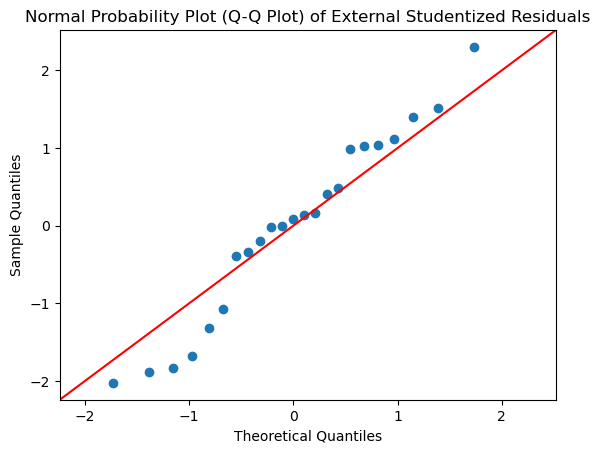

In [20]:
# Calculate the external studentized residuals
influence = final_model.get_influence()
external_studentized_residuals = influence.resid_studentized_external

# Create a Q-Q plot using the external studentized residuals
sm.qqplot(external_studentized_residuals, line='45')
plt.title('Normal Probability Plot (Q-Q Plot) of External Studentized Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.savefig('qqplot_final.png')
plt.show()

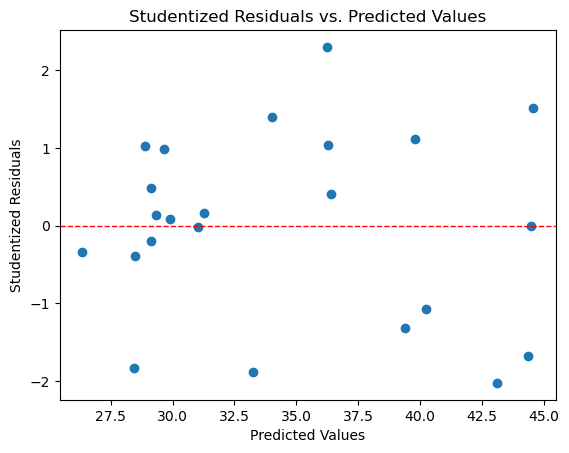

In [21]:
# Calculate predicted values
predicted_y = final_model.fittedvalues

plt.scatter(predicted_y, external_studentized_residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Studentized Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Studentized Residuals')
plt.savefig('res_v_y_final.png')
plt.show()

#### Bootstrap Sampling
Below is code to bootstrap sample the coefficients of our final model

In [22]:
# Fit the initial model (for reference)
# model = sm.OLS(y, X).fit()
print("Original Model Coefficients:\n", final_model.params)

# Number of bootstrap samples
n_bootstrap = 1000

# Store bootstrap coefficients
bootstrap_coefs = np.zeros((n_bootstrap, X3.shape[1]))

# Perform bootstrap sampling
for i in range(n_bootstrap):
    # Resample with replacement
    bootstrap_indices = np.random.choice(np.arange(len(y3)), size=len(y3), replace=True)
    X_bootstrap = X3.iloc[bootstrap_indices]
    y_bootstrap = y3.iloc[bootstrap_indices]
    
    # Fit the model on the bootstrap sample
    bootstrap_model = sm.OLS(y_bootstrap, X_bootstrap).fit()
    
    # Store the coefficients
    bootstrap_coefs[i] = bootstrap_model.params

# Convert bootstrap results to a DataFrame for easier analysis
bootstrap_coefs_df = pd.DataFrame(bootstrap_coefs, columns=sm.add_constant(x3).columns)
# print("boostrap samples: ", bootstrap_coefs_df)

# Calculate the mean and 95% confidence intervals for the coefficients
coef_means = bootstrap_coefs_df.mean()
coef_ci = bootstrap_coefs_df.quantile([0.025, 0.975])

print("\nBootstrap Coefficients Mean:\n", coef_means)
print("\nBootstrap 95% Confidence Intervals:\n", coef_ci)


Original Model Coefficients:
 const      -728.260852
x1           85.149080
x2          792.679684
x4          432.898131
x5            3.167848
x9            1.642477
x1*x2       -93.282797
x1*x4       -44.595623
x2*x4      -456.982026
x4*x6        -2.483078
x1*x2*x4     52.776696
dtype: float64

Bootstrap Coefficients Mean:
 const      -813.709332
x1           89.075572
x2          895.311166
x4          471.527882
x5            3.199839
x9            2.065256
x1*x2      -100.561469
x1*x4       -44.102806
x2*x4      -512.314075
x4*x6        -2.469223
x1*x2*x4     55.481057
dtype: float64

Bootstrap 95% Confidence Intervals:
              const          x1           x2           x4        x5        x9   
0.025 -2670.437520 -100.524554  -318.970539  -277.216608  0.347452 -0.894368  \
0.975   402.475525  326.797930  2790.607527  1575.840933  5.716134  4.594622   

            x1*x2       x1*x4        x2*x4     x4*x6    x1*x2*x4  
0.025 -332.112861 -179.827354 -1556.239594 -4.204200  -50

#### K-Fold Cross Validation

In [27]:
X = X3
y = y3

# Define the number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Store the results
r2_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Predict and calculate R-squared on the test set
    y_pred = final_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Print the cross-validation scores and the mean score
print("Cross-validation R-squared scores:", r2_scores)
print("Mean R-squared score:", np.mean(r2_scores))


Cross-validation R-squared scores: [0.9395676193735023, 0.9805142561692053, 0.9781765074897173, 0.9627383553391694, 0.585712492141873]
Mean R-squared score: 0.8893418461026934
